In [ ]:
import pandas as pd

In [ ]:
df20all = pd.read_csv('/Users/zhangzhiwen/Desktop/ERGO-master/ERGOdata20.csv')

In [ ]:
df10all = pd.read_csv('/Users/zhangzhiwen/Desktop/ERGO-master/test_data10.csv')

In [ ]:
df20allcount = df20all.groupby(['CDR3','AA']).size().sort_values(ascending=False)


In [ ]:
df20allcount = df20allcount.reset_index()
df20allcount.rename(columns={0: 'count'}, inplace=True)

In [ ]:
df20allcount

In [ ]:
df20allcount = df20allcount[['CDR3','AA']]

In [ ]:
df20allcount

In [ ]:
df20allcount_drop = df20allcount.drop(df20allcount[df20allcount.CDR3.str.contains(r'[@#&$%+-/*X]')].index)

In [ ]:
df20allcount_drop = df20allcount_drop.drop(df20allcount_drop[df20allcount_drop.AA.str.contains(r'[@#&$%+-/*X]')].index)

In [ ]:
df20allcount_drop

In [ ]:
#df20allcount_drop = df20allcount_drop.drop(df20allcount_drop[df20allcount_drop.TRBV_gene.str.contains(r'[@#&%+*X]')
                                                            #|df20allcount_drop.TRBJ_gene.str.contains(r'[@#&%+*X]')].index)





In [ ]:
df20allcount_drop = df20allcount_drop.sample(frac=1)

In [ ]:
#df20allcount_drop.to_csv('deepTCR_compare_noVJ10.csv',index = False)

In [ ]:
AA_list = list(set(df20allcount_drop['AA']))

In [ ]:
len(AA_list)

In [ ]:
import os

In [ ]:
def tocsv(aalist,dataframe):
    for i in aalist:
        out = dataframe.loc[dataframe['AA'] == i]
        dirname=str(i)
        os.mkdir('/Users/zhangzhiwen/Documents/deepTCR_compare10_noVJ/{}'.format(dirname))
        filename=str(i)
        out[['CDR3','AA']].to_csv('/Users/zhangzhiwen/Documents/deepTCR_compare10_noVJ/{d}/{f}.tsv'.format(d=dirname,f=filename),sep='\t',index = None)
                                                               
                                                                  
                                                                  
    

In [ ]:
tocsv(AA_list,df20allcount_drop)

In [1]:
import DeepTCR

In [2]:
from DeepTCR.DeepTCR import DeepTCR_SS

# Instantiate training object
DTCR_SS = DeepTCR_SS('deepTCR_compare20_noVJ_1')

#Load Data from directories
DTCR_SS.Get_Data(directory='/Users/zhangzhiwen/Documents/deepTCR_compare20_noVJ',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=None,v_beta_column=None,j_beta_column=None)

Loading Data...
Embedding Sequences...
Data Loaded


In [3]:
DTCR_SS.Get_Train_Valid_Test(test_size=0.2)
DTCR_SS.Train()






Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.Dense instead.






Training_Statistics: 
 Epoch: 1 Training loss: 5.04811 Validation loss: 4.85046 Testing loss: 4.88051 Training Accuracy: 0.031509 Validation Accuracy: 0.050259 Testing AUC: 0.58452
Training_Statistics: 
 Epoch: 2 Training loss: 4.82907 Validation loss: 4.79838 Testing loss: 4.83040 Training Accuracy: 0.039825 Validation Accuracy: 0.039794 Testing AUC: 0.60735
Training_Statistics: 
 Epoch: 3 Training loss: 4.78117 Validation loss: 4.75844 Testing loss: 4.79484 Training Accuracy: 0.043047 Validation Accuracy: 0.044772 Testing AUC: 0.61817
Training_Statistics: 
 Epoch: 4 Training loss: 4.73762 Validation loss: 4.72638 Testing loss: 4.76628 Training Accuracy: 0.046504

Training_Statistics: 
 Epoch: 24 Training loss: 4.26306 Validation loss: 4.62008 Testing loss: 4.71127 Training Accuracy: 0.073844 Validation Accuracy: 0.056775 Testing AUC: 0.66077
Done Training
INFO:tensorflow:deepTCR_compare20_noVJ_1/models/model_0/model.ckpt is not in all_model_checkpoint_paths. Manually adding it.


/Users/zhangzhiwen/opt/anaconda3/lib/python3.7/site-packages/DeepTCR-1.4.19-py3.7.egg/DeepTCR/DeepTCR.py:2949: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


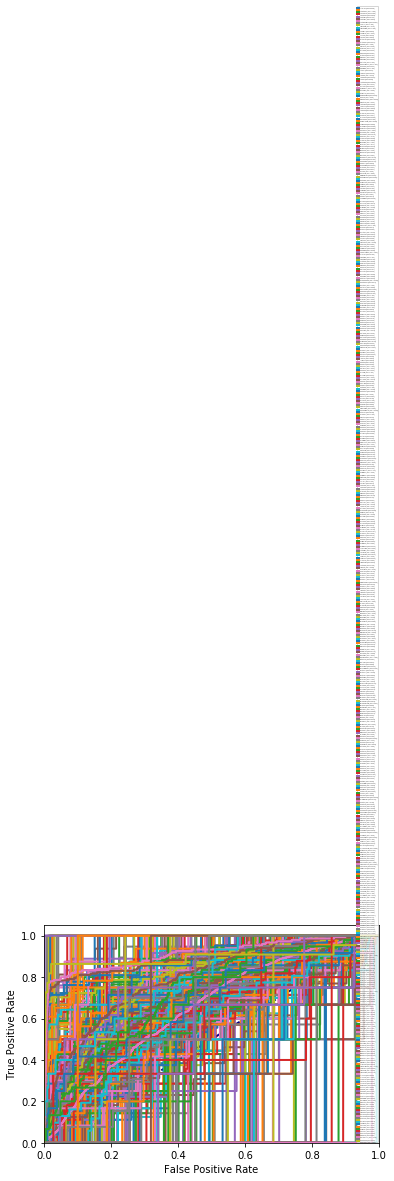

In [5]:
DTCR_SS.AUC_Curve(legend_font_size=0)